In [3]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting()

t, u = symbols('t u')

# Euler angles
phi, theta, psi = dynamicsymbols('\phi \ttheta \psi')

# Cable angles
phiL, thetaL = dynamicsymbols('\phi_L \ttheta_L')

# Quadrotor position variables
x, y, z = dynamicsymbols('x y z')

# Physical parameters
m, M, l, g = symbols('m M l g')

# Load position
xL = x - l*sin(thetaL)
yL = y + l*sin(phiL)*cos(thetaL)
zL = z - l*cos(phiL)*cos(thetaL)

# Auxiliary variables
ux, uy, uz = symbols('u_x u_y u_z');
# ux = cos(phi)*sin(theta)*cos(psi) + sin(phi)*sin(psi)
# uy = cos(phi)*sin(theta)*sin(psi) - sin(phi)*cos(psi)
# uz = cos(phi)*cos(theta)


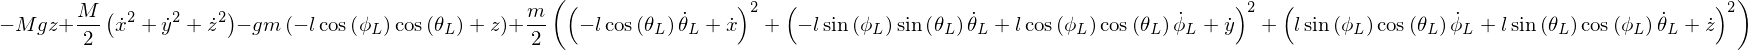

In [75]:
T = M/2*(diff(x)**2+diff(y)**2+diff(z)**2) + m/2*(diff(xL,t)**2+diff(yL,t)**2+diff(zL,t)**2)
V = M*g*z + m*g*zL
L = T-V
L

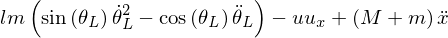

In [69]:
eqX = expand(diff(diff(L,diff(x)),t) - diff(L,x)-ux*u)
eqX = collect(collect(eqX,diff(x,t,2)),m*l)
eqX

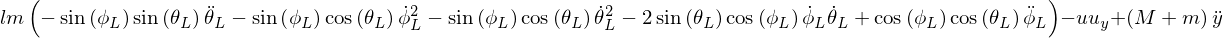

In [80]:
eqY = expand(diff(diff(L,diff(y)),t) - diff(L,y)-uy*u)
eqY = collect(collect(eqY,diff(y,t,2)),m*l)
eqY

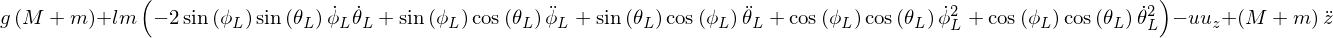

In [81]:
eqZ = expand(diff(diff(L,diff(z)),t) - diff(L,z)-uz*u)
eqZ = collect(collect(collect(eqZ,diff(z,t,2)),g),m*l)
eqZ

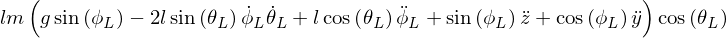

In [83]:
eqPhiL = simplify(diff(diff(L,diff(phiL)),t) - diff(L,phiL))
eqPhiL

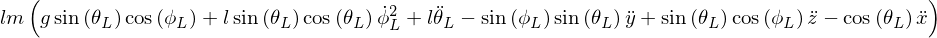

In [101]:
eqThetaL = simplify(diff(diff(L,diff(thetaL)),t) - diff(L,thetaL))
eqThetaL = collect(eqThetaL,diff(z,t,2))
eqThetaL = collect(eqThetaL,diff(y,t,2))
eqThetaL = collect(eqThetaL,g)
eqThetaL = expand_trig(eqThetaL)
eqThetaL

In [119]:
res = solve([eqX,eqY,eqZ,eqPhiL,eqThetaL],[diff(x,t,2),diff(y,t,2),diff(z,t,2),diff(phiL,t,2),diff(thetaL,t,2)])

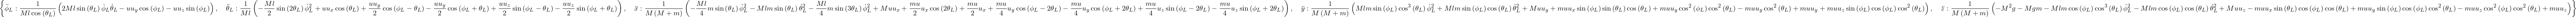

In [117]:
res

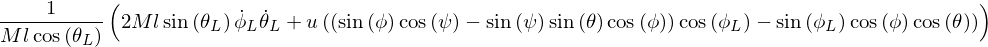

In [137]:
phiLddot = res[diff(phiL,t,2)]
phiLddot = phiLddot.subs([(uy,cos(phi)*sin(theta)*sin(psi)-sin(phi)*cos(psi)),(uz,cos(phi)*cos(theta))])
phiLddot = simplify(phiLddot)
phiLddot = collect(phiLddot,u)
phiLddot

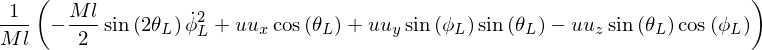

In [146]:
thetaLddot = res[diff(thetaL,t,2)]
thetaLddot = simplify(expand_trig(thetaLddot))
thetaLddot

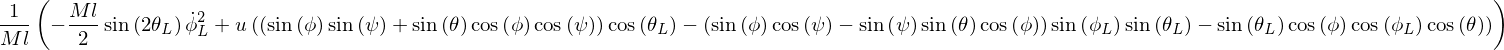

In [156]:
thetaLddot = res[diff(thetaL,t,2)]
thetaLddot = simplify(expand_trig(thetaLddot))
thetaLddot = thetaLddot.subs([(ux,cos(phi)*sin(theta)*cos(psi)+sin(phi)*sin(psi)), (uy,cos(phi)*sin(theta)*sin(psi)-sin(phi)*cos(psi)),(uz,cos(phi)*cos(theta))])
thetaLddot = simplify(collect(thetaLddot,u))
thetaLddot

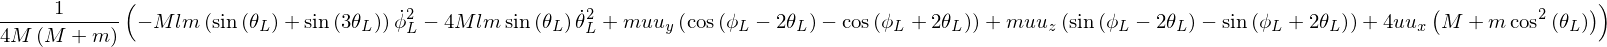

In [197]:
xddot = res[diff(x,t,2)]
xddot = collect(xddot,diff(phiL,t)**2)
xddot = collect(xddot,u*ux)
xddot = collect(xddot,u*uy)
xddot = collect(xddot,u*uz)
xddot = simplify(xddot)
xddot

In [233]:
simplify(expand_trig(sin(theta)+sin(3*theta)))

In [202]:
expand_trig(cos(phi-2*theta)-cos(phi+2*theta))

In [203]:
expand_trig(sin(phi-2*theta)-sin(phi+2*theta))

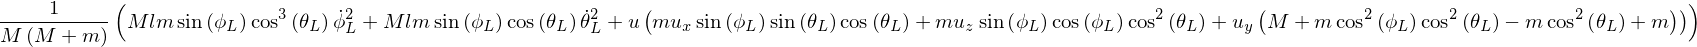

In [231]:
yddot = res[diff(y,t,2)]
yddot = collect(yddot,u*ux)
yddot = collect(yddot,u*uy)
yddot = collect(yddot,u*uz)
yddot = collect(yddot,u)
yddot

In [221]:
trigsimp(cos(phi)**2*cos(theta)**2-cos(theta)**2)

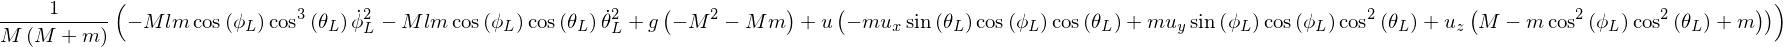

In [232]:
zddot = res[diff(z,t,2)]
zddot = collect(zddot,g)
zddot = collect(zddot,u*ux)
zddot = collect(zddot,u*uy)
zddot = collect(zddot,u*uz)
zddot = collect(zddot,u)
zddot

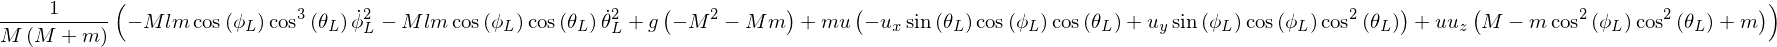

In [229]:
collect(zddot,m*u)

In [239]:
trigsimp(-cos(phi)**2*cos(theta)**2)

In [237]:
expand_trig(cos(theta)**2+1)

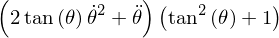

In [5]:
diff(tan(theta),t,2)